In [2]:
import numpy as np
import pygad
import pandas as pd
import random

def fitness_func(ga_instance, solution, solution_idx):
    group_a = [diamond_values[i] for i in range(len(solution)) if solution[i] == 0]
    group_b = [diamond_values[i] for i in range(len(solution)) if solution[i] == 1]
    diff = abs(sum(group_a) - sum(group_b))
    return 1.0 / (1.0 + diff)  # Inverse of the difference


In [77]:
num_genes = 25
diamond_values = [random.randint(1, 100) for _ in range(num_genes)]
# diamond_values = [random.randint(1, 5)*random.randint(5, 10)*random.randint(15, 20) for _ in range(num_genes)]

In [78]:
num_generations = 1000
num_parents_mating = 2
sol_per_pop = 5

mutation_probs = [0.01, 0.05, 0.1]
parent_selection_types = ["sss", "rws", "tournament"]
crossover_types = ["single_point", "two_points", "uniform"]

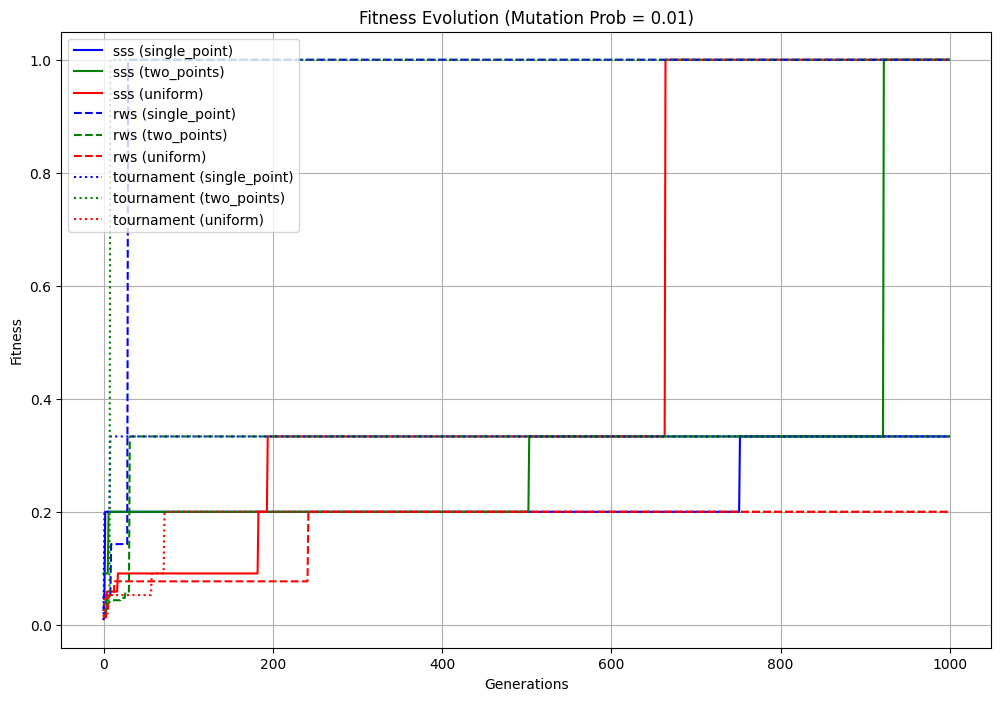

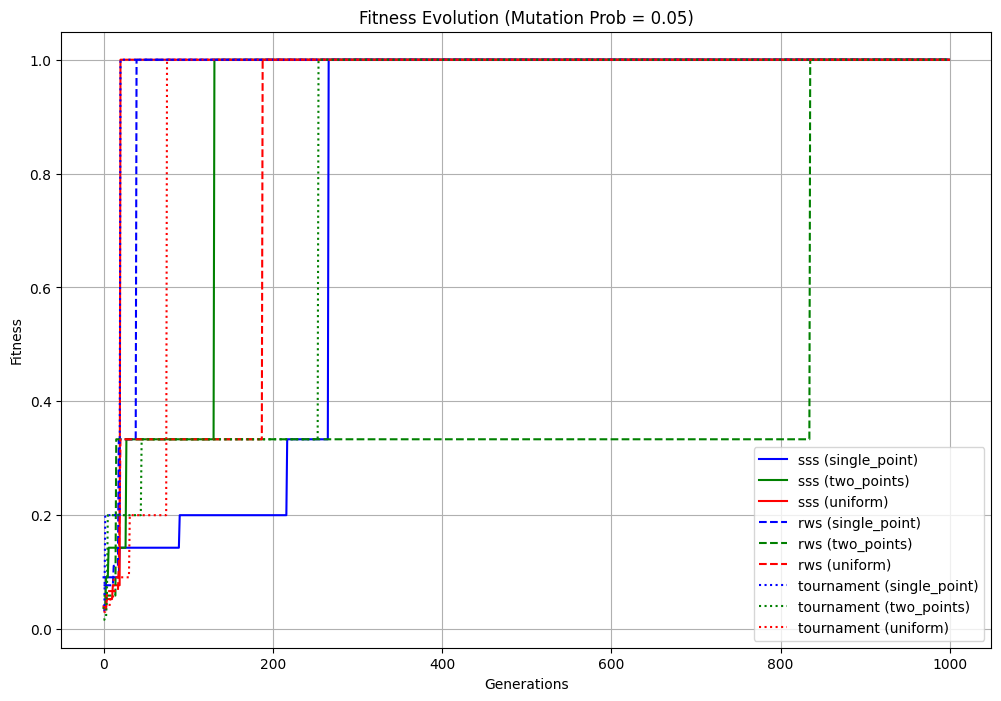

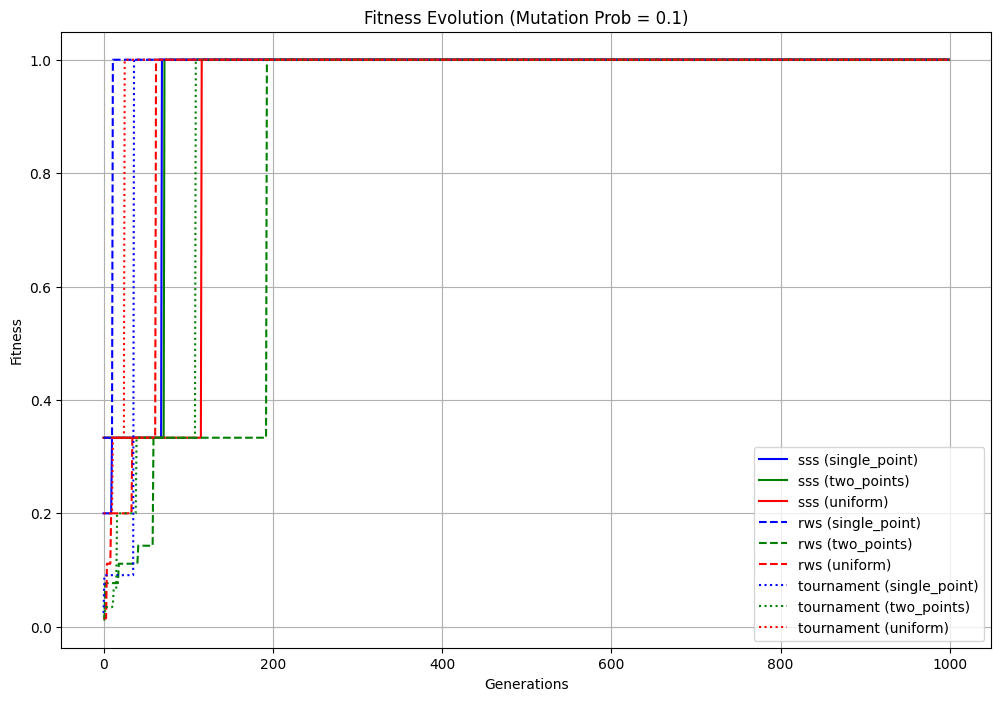

In [79]:
import os
import matplotlib.pyplot as plt

line_styles = {"sss": "solid", "rws": "dashed", "tournament": "dotted"}
colors = {"single_point": "blue", "two_points": "green", "uniform": "red"}

performance_data = []
output_folder = "20_diamonds"
os.makedirs(output_folder, exist_ok=True)

for mutation_prob in mutation_probs:
    for selection_type in parent_selection_types:
        for crossover_type in crossover_types:
            # print(f"Running GA with mutation_prob={mutation_prob}, "
                #   f"selection_type={selection_type}, crossover_type={crossover_type}")
            
            fitness_history = []

            def on_generation(ga_instance):
                fitness_history.append(ga_instance.best_solution()[1])

            ga_instance = pygad.GA(
                num_generations=num_generations,
                num_parents_mating=num_parents_mating,
                fitness_func=fitness_func,
                sol_per_pop=sol_per_pop,
                num_genes=num_genes,
                gene_type=int,
                gene_space=[0, 1],
                parent_selection_type=selection_type,
                crossover_type=crossover_type,
                mutation_probability=mutation_prob,
                on_generation=on_generation,
            )
            
            ga_instance.run()
            solution, solution_fitness, solution_idx = ga_instance.best_solution()
            
            # group_a = [diamond_values[i] for i in range(len(solution)) if solution[i] == 0]
            # group_b = [diamond_values[i] for i in range(len(solution)) if solution[i] == 1]
            # print(f"Best solution: {solution}")
            # print(f"Group A: {group_a}, Group B: {group_b}")
            # print(f"Fitness: {solution_fitness}, Difference: {abs(sum(group_a) - sum(group_b))}")
            # print("-" * 50)

            performance_data.append({
                "mutation_prob": mutation_prob,
                "selection_type": selection_type,
                "crossover_type": crossover_type,
                "best_fitness": solution_fitness,
                "convergence_speed": len(fitness_history),
                "fitness_history": fitness_history,
            })

for mutation_prob in mutation_probs:
    plt.figure(figsize=(12, 8))
    for selection_type in parent_selection_types:
        for crossover_type in crossover_types:
            data = [
                p for p in performance_data
                if p["mutation_prob"] == mutation_prob
                and p["selection_type"] == selection_type
                and p["crossover_type"] == crossover_type
            ]
            if data:
                fitness_history = data[0]["fitness_history"]
                plt.plot(
                    fitness_history,
                    label=f"{selection_type} ({crossover_type})",
                    linestyle=line_styles[selection_type],
                    color=colors[crossover_type]
                )

    plt.title(f"Fitness Evolution (Mutation Prob = {mutation_prob})")
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.legend()
    plt.grid()
    file_name = f"fitness_evolution_mutation_prob_{mutation_prob}.png"
    plt.savefig(os.path.join(output_folder, file_name))
    plt.show()

In [87]:
num_genes = 20
num_generations = 150
num_parents_mating = 2
sol_per_pop = 3

mutation_probs = [0.01, 0.05, 0.1]
# mutation_probs = [0.1, 0.5, 0.8, 0.1]
parent_selection_types = ["sss", "rws", "tournament"]
crossover_types = ["single_point", "two_points", "uniform"]

results = {prob: [] for prob in mutation_probs}
performance_data = {prob: {} for prob in mutation_probs}

for run in range(1000):
    diamond_values = [random.randint(1, 5)*random.randint(5, 10) for _ in range(num_genes)]
    # diamond_values = random.choices([1, 4, 27], k=num_genes)
    # diamond_values = [random.randint(1, 100) for _ in range(num_genes)]

    for mutation_prob in mutation_probs:
        for selection_type in parent_selection_types:
            for crossover_type in crossover_types:
                fitness_history = []
                best_solutions = []

                def on_generation(ga_instance):
                    best_solutions.append(ga_instance.best_solution()[1])
                    fitness_history.append(ga_instance.best_solution()[1])

                ga_instance = pygad.GA(
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_func,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    gene_type=int,
                    gene_space=[0, 1],
                    parent_selection_type=selection_type,
                    crossover_type=crossover_type,
                    mutation_probability=mutation_prob,
                    on_generation=on_generation,
                )
                
                ga_instance.run()
                solution, solution_fitness, solution_idx = ga_instance.best_solution()

                # Визначення чи знайдено розв'язок і кількість поколінь для цього
                found_best = 1 if solution_fitness == 1.0 else 0
                if found_best:
                    generations_to_best = next((i for i, f in enumerate(fitness_history) if f == solution_fitness), len(fitness_history))
                else:
                    generations_to_best = None

                # Додавання результатів performance data
                key = f"{selection_type} + {crossover_type}"
                if key not in performance_data[mutation_prob]:
                    performance_data[mutation_prob][key] = {
                        "num_best_found": 0,
                        "generations_to_best": [],
                    }
                
                performance_data[mutation_prob][key]["num_best_found"] += found_best
                performance_data[mutation_prob][key]["generations_to_best"].append(generations_to_best)

for mutation_prob, config_data in performance_data.items():
    table_data = []
    for config, metrics in config_data.items():
        num_best_found = metrics["num_best_found"]
        temp = np.mean([x for x in metrics["generations_to_best"] if x is not None])
        avg_generations_to_best = int(temp) if not np.isnan(temp) else np.nan
        table_data.append({
            "Selection + Crossover": config,
            "Best_Sol_Runs": num_best_found,
            "Avg_Gens": avg_generations_to_best,
        })
    
    table = pd.DataFrame(table_data)
    table.set_index("Selection + Crossover", inplace=True)
    print(f"Results for Mutation Probability = {mutation_prob}")
    print(table)
    print("-" * 80)


c:\Users\dimap\.pyenv\pyenv-win\versions\3.11.6\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Results for Mutation Probability = 0.01
                           Best_Sol_Runs  Avg_Gens
Selection + Crossover                             
sss + single_point                    86        29
sss + two_points                      85        33
sss + uniform                         87        31
rws + single_point                    96        39
rws + two_points                      93        35
rws + uniform                         82        42
tournament + single_point             80        39
tournament + two_points               97        37
tournament + uniform                 105        34
--------------------------------------------------------------------------------
Results for Mutation Probability = 0.05
                           Best_Sol_Runs  Avg_Gens
Selection + Crossover                             
sss + single_point                   322        49
sss + two_points                     343        54
sss + uniform                        370        48
rws + single_point     